In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imutils
import glob
import os
import cv2

In [3]:
# Define Parameters for Disparity
min_disp = 1*16 # 7
num_disp = 3*16 # 3*16
block_size = 11 # NEEDS TO BE ODD. LARGER = SMOOTHER AND LESS ACCURATE

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=5)
stereo.setMinDisparity(min_disp)
stereo.setDisp12MaxDiff(200) # 200
stereo.setUniquenessRatio(3) # 3
stereo.setSpeckleRange(3) # 3
stereo.setSpeckleWindowSize(100) # 3

# h,w,c = (720, 1280, 3)
winSize = 5
# numberOfDisparities = int((w / 8) + 15) & -16
# stereo = cv2.StereoBM_create(0,16,3)
# stereo = cv2.StereoSGBM_create(0,16,3)
stereo = cv2.StereoSGBM_create(0,16,5)
stereo.setPreFilterCap(32)
# stereo.setP1(8*c*winSize**2)
# stereo.setP2(32*c*winSize**2)
stereo.setMinDisparity(0)
stereo.setBlockSize(winSize)
# stereo.setNumDisparities(numberOfDisparities)
# stereo.setDisp12MaxDiff(100)
stereo.setUniquenessRatio(5) #10
# stereo.setSpeckleRange(32)
# stereo.setSpeckleWindowSize(0)
# disp = stereo.compute(left, right).astype(np.float32) / 16.0
# disp = cv2.medianBlur(disp, 5)


def get_disparity_for_frame(imgleft, imgright):

    disparity = stereo.compute(imgleft, imgright)
    # disparity = cv2.medianBlur(disparity, 5)

    min = disparity.min()
    max = disparity.max()
    disparity = np.uint8(6400 * (disparity - min) / (max - min))
    print(disparity)
    cv2.imshow('disparity', np.hstack((imgleft, imgright, disparity)))
    plt.imshow(disparity)    

    return disparity

In [21]:
def calculate_depth(disparity, baseline = 120, focalLength = 700):
    depth = focalLength*baseline/disparity
    return depth

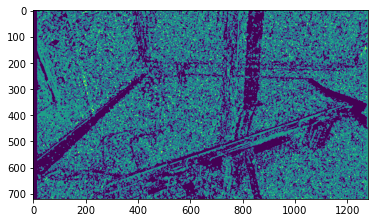

In [4]:
# Load Data and Loop Through Frames
leftImages = glob.glob('./../../Data/stereo_conveyor_without_occlusions_undistorted/left/*.png')
assert leftImages
counter = 0

for leftName in sorted(leftImages):
    rightName = leftName.replace('left','right').replace('Left','Right')
    
    # Read left and right frames
    leftFrame = cv2.imread(leftName)
    leftGray = cv2.cvtColor(leftFrame, cv2.COLOR_BGR2GRAY)
    rightFrame = cv2.imread(rightName)
    rightGray = cv2.cvtColor(rightFrame, cv2.COLOR_BGR2GRAY)

    disparity = get_disparity_for_frame(leftGray, rightGray)
    
    #press 'q' to kill
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

    counter = counter+1
    # if counter == 10000:
    #     break

    cv2.destroyAllWindows()



In [4]:
leftFrame.shape

(720, 1280, 3)